# Introduction

We are going to rely on this machine learning library https://github.com/ageitgey/face_recognition to make a face recognizer.

The process is straightforward:

1. Get training data (which in our case will be face encodings) and clean it (which is already done for us)
2. Train a machine learning model using the training data. We chose a Suppport Vector Machine (SVM) for this
3. Test our trained model using testing data 
4. Save the model


The following is what an SVM looks like:

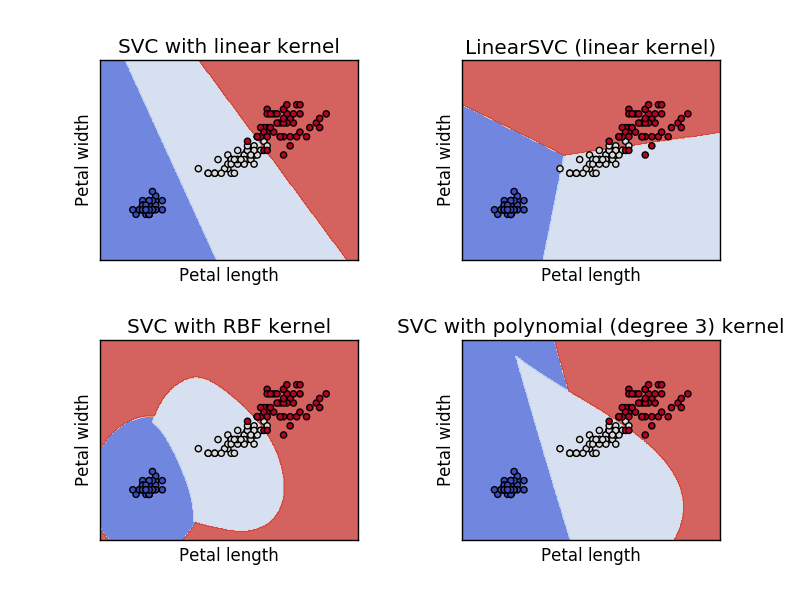

In [ ]:
# import our libraries

import face_recognition # used for encoding our face images (i.e. turning images into numbers)
from sklearn import svm # used for training our classifier with face encodings
import os # used to get images from our computer

In [ ]:
# get faces from images and store their encodings with their labels in python lists

train_encodings = []
train_names = []

train_dir_name = "data/train/" 
train_dir = os.listdir(train_dir_name)

for person in train_dir:
    pics = os.listdir(train_dir_name + person)
    for pic in pics:
        face = face_recognition.load_image_file(train_dir_name + person + "/" + pic)
        
        # assume there is just 1 face per picture   
        face_encoding = face_recognition.face_encodings(face)[0] 
        train_encodings.append(face_encoding)
        train_names.append(person)

In [ ]:
# do the same for our testing data (get faces from images and store their encodings with their labels in python lists)

test_encodings = []
test_names = []

test_dir_name = "data/test/" 
test_dir = os.listdir(test_dir_name)

for person in test_dir:
    pics = os.listdir(test_dir_name + person)
    for pic in pics:
        face = face_recognition.load_image_file(test_dir_name + person + "/" + pic)
        
        # assume there is just 1 face per picture   
        face_encoding = face_recognition.face_encodings(face)[0] 
        test_encodings.append(face_encoding)
        test_names.append(person)

In [ ]:
# an encoding is just a numerical measurement of a face
# there are 128 measurements per encoding and we will use this to train a model
# the model will match unknown faces with known faces

print(len(train_encodings[0]), train_names[0])

In [ ]:
# train model

clf = svm.SVC()
clf.fit(train_encodings, train_names)

In [ ]:
# check for accuracy

from sklearn.metrics import accuracy_score

predicted_names = clf.predict(test_encodings)

print("Our accuracy is {}".format(accuracy_score(test_names, predicted_names)))

In [ ]:
# save our machine learning model so we can reuse it later

import pickle # pickle allows us to save a Python object into disk and reuse it later

with open("trained_blackpink_recognizer.dat", "wb") as f:
    pickle.dump(clf, f)

In [ ]:
# now we can reuse our trained model without training a new one

with open("trained_blackpink_recognizer.dat", "rb") as f:
    clf_loaded = pickle.load(f)
    
clf_loaded.predict(test_encodings)

In [ ]:
# note: this model will fail if you enter a face of someone it has not seen before
# it is only useful in predicting which Blackpink member is which given a new picture

# Recommended work

This week, your main objective is just to acquire a surface-level view of machine learning. We won't get too deep with this topic, but you should know a few use cases where you can use a machine learning technique.

1. Do your own research on the use cases of machine learning
2. Research the three main types of machine learning techniques--supervised, unsupervised, and reinforcement learning
3. Play with the noteboooks here: https://github.com/maykulkarni/Machine-Learning-Notebooks
4. Find machine learning tutorials and just try to follow them (e.g. Google "create a movie recommender with scikit learn")